<a href="https://colab.research.google.com/github/kilua762/malnutrition-classification/blob/main/stunting_classification_rev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ai project cycle**

dalam pembuatan suatu machine learning ada beberapa tahap
1. Problem Scopping yaitu penjelasan mengenai permasalahan yang terkait kemudian bisa diselesaikan dengan machine learning.
2. Data Accuisition sumber data yang untuk aplikasi "https://github.com/sstevenadi/StuntingDataAnalysis.git"

3. Data Exploration tahapan pemrosesan data meliputi: 
          a.statistik
          b.deskriptif
          c.visualitatif
4. modelling algoritma yang digunakan dalam pengklasifikasian data 
5. penjabaran hasil yang didapat untuk menguji akurasi data yang akan digunakan.
6. deployment pengaplikasian dalam bentuk web menggunakan Flask (framework phython) memudahkan pengguna


# **Data Exploration**

In [1]:
#menampilkan Grafik
import matplotlib.pyplot as plt
import seaborn as sns

#data Transformation
import pandas as pd
import numpy as np

#membanru dalam pembuatan model dan mempersiapkan data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer

#model yang digunakan
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

#model Clustering
from sklearn.cluster import KMeans 

#magic line untuk matplotlib
%matplotlib inline

In [4]:
#membaca data
url =  ('https://raw.githubusercontent.com/kilua762/malnutrition-classification/main/Data/Stunting.xlsx')
data_stunting = pd.read_excel(url)

In [5]:
#Didalam data terdapat beberapa char non-ascii jadi di hilangkan dahulu
data_stunting = data_stunting.applymap(lambda x : x.replace('\xa0', '') if type(x) == str else x)

data_stunting.sample(10)

,NIK,Nama,JK,Tgl Lahir,BB Lahir,TB Lahir,Nama Ortu,Prov,Kab/Kota,Kec,...,ZS BB/U,TB/U,ZS TB/U,BB/TB,ZS BB/TB,Naik Berat Badan,PMT Diterima (kg),Jml Vit A,KPSP,KIA
286,5305422602218172,THEODORUS LEANDRO MEOL,L,2021-02-26,3,49,SALESTINUS MEOL,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.09,Pendek,-2.25,Gizi Baik,-1.27,N,-,1.0,-,-
152,5305426002170007,HELDA OEMANAS,P,2017-02-20,2.9,0,LEONARDUS OEMANAS,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.39,Pendek,-2.08,Gizi Baik,-0.11,N,0,1.0,-,-
235,5305421012199442,ANDREAS TANI SELAN,L,2019-12-10,3.3,49,APRIS SELAN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.94,Pendek,-2.17,Gizi Baik,-1.07,N,0,1.0,-,-
288,5305420606219418,HUBERTUS J. USFINIT,L,2021-06-06,2.5,47,SAFERIUS USFINIT,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-3.48,Sangat Pendek,-3.33,Gizi Kurang,-2.05,T,-,1.0,-,-
227,5305422412179943,YOHANES K USKONO,L,2017-12-24,2.9,48,EMANUEL ELAN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.67,Pendek,-2.44,Gizi Baik,-1.91,N,0,1.0,-,-
294,5305422702206457,YOHANES F. OELEU,L,2020-02-27,3,47,SELVIANA OELEU,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.40,Pendek,-2.48,Gizi Baik,-0.17,N,0,1.0,-,-
18,5305420611179477,NOVI A FUNAN,L,2017-11-06,2.9,48,ARKIFRIDUS SENE,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.48,Sangat Pendek,-3.24,Gizi Baik,-0.84,T,0,1.0,-,-
237,5305424405206179,MAGDALENA A. SAKO TNAAUNI,P,2020-05-04,3.4,48,MARIANUS S. TETHUN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.21,Pendek,-2.18,Gizi Baik,-0.16,N,0,1.0,-,-
101,5305426101190000,AGNESA C. AHOINAI,P,2019-01-21,2.9,NaN,ALFRIDUS AHOINNAI,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.48,Pendek,-2.15,Gizi Baik,-1.74,N,0,1.0,-,-
285,5305422112209906,BY NAIHELI,L,2020-12-21,2.9,48,YOSEP NAIHELI,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.11,Pendek,-2.78,Gizi Baik,0.35,T,0,1.0,-,-


In [6]:
#Melihat info data
data_stunting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NIK                 311 non-null    object 
 1   Nama                311 non-null    object 
 2   JK                  311 non-null    object 
 3   Tgl Lahir           311 non-null    object 
 4   BB Lahir            311 non-null    object 
 5   TB Lahir            217 non-null    object 
 6   Nama Ortu           311 non-null    object 
 7   Prov                311 non-null    object 
 8   Kab/Kota            311 non-null    object 
 9   Kec                 311 non-null    object 
 10  Pukesmas            311 non-null    object 
 11  Desa/Kel            311 non-null    object 
 12  Posyandu            311 non-null    object 
 13  RT                  193 non-null    float64
 14  RW                  193 non-null    float64
 15  Alamat              311 non-null    object 
 16  Usia Saa

In [7]:
#Melihat data yang tidak ada nilainya atau null
data_stunting.isna().sum()

NIK                     0
Nama                    0
JK                      0
Tgl Lahir               0
BB Lahir                0
TB Lahir               94
Nama Ortu               0
Prov                    0
Kab/Kota                0
Kec                     0
Pukesmas                0
Desa/Kel                0
Posyandu                0
RT                    118
RW                    118
Alamat                  0
Usia Saat Ukur          0
Tanggal Pengukuran      0
Berat                   0
Tinggi                  0
LiLA                   26
BB/U                    0
ZS BB/U                 0
TB/U                    0
ZS TB/U                 0
BB/TB                   0
ZS BB/TB                0
Naik Berat Badan        0
PMT Diterima (kg)       0
Jml Vit A              25
KPSP                    1
KIA                     0
dtype: int64

In [8]:
# Mengatasi data yang tidak ada nilainya
data_stunting.dropna()

,NIK,Nama,JK,Tgl Lahir,BB Lahir,TB Lahir,Nama Ortu,Prov,Kab/Kota,Kec,...,ZS BB/U,TB/U,ZS TB/U,BB/TB,ZS BB/TB,Naik Berat Badan,PMT Diterima (kg),Jml Vit A,KPSP,KIA
5,5305424808170000,RIVALDO METAN,L,2017-08-08,2.9,0,DEDI Y. FOLE,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.55,Pendek,-2.09,Gizi Baik,-0.41,N,0,1.0,-,-
24,5303201003170001,marten naiobe,L,2017-03-10,2.3,0,david naiobe,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.37,Pendek,-2.59,Gizi Baik,-1.24,N,0,1.0,-,-
30,5305426812191816,BERNADINA NATALIA NAISALI,P,2019-12-28,3,48,YOS BANASE,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.01,Pendek,-2.10,Gizi Baik,0.18,N,0,1.0,-,-
34,5305420612170001,PAULO D. BALA,L,2017-12-06,3,0,KLAUDIUS METBOKI,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.42,Pendek,-2.18,Gizi Baik,-1.74,T,0,1.0,-,-
35,5305424211170001,ADRIELA N. OMENU,P,2017-11-02,2.6,0,FIDELIS OMENU,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.79,Pendek,-2.92,Gizi Baik,0.01,T,0,1.0,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,5305422507204717,ALEXAN M. NAITILI,L,2020-07-25,2.9,49,YOSEPH G. ABI,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.50,Pendek,-2.22,Gizi Baik,-0.62,T,0,1.0,-,-
306,5305424808201533,FELISIA AIRIN BIKOLO,P,2020-08-08,2.5,46,YULIUS KOLO,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-3.29,Pendek,-2.81,Gizi Kurang,-2.57,T,0,1.0,-,-
307,5305426608209012,ALISKA G. UN,P,2020-08-26,3.7,50,FELIX UN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.82,Pendek,-2.18,Gizi Baik,-1.05,T,0,1.0,-,-
308,5305420902219648,FEBRIANUS T. SURI,L,2021-02-09,2.6,48,FLAVIANUS O. SURI,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.23,Pendek,-2.69,Gizi Baik,-1.17,T,-,1.0,-,-


In [10]:
#Melihat data presentase BB/U 
data_stunting['BB/U'].value_counts()/data_stunting.shape[0]*100


Kurang                51.446945
Berat Badan Normal    33.440514
Sangat Kurang         15.112540
Name: BB/U, dtype: float64

In [11]:
#melihat data presentase TB/U
data_stunting['TB/U'].value_counts()/data_stunting.shape[0]*100

Pendek           80.385852
Sangat Pendek    19.614148
Name: TB/U, dtype: float64

In [12]:
#Melihat data presentase BB/TB
data_stunting['BB/TB'].value_counts()/data_stunting.shape[0]*100

Gizi Baik            81.993569
Gizi Kurang          15.434084
Risiko Gizi Lebih     1.929260
Gizi Lebih            0.643087
Name: BB/TB, dtype: float64

In [13]:
#Untuk mengubah data kategorical menjadi angka
le = LabelEncoder()

data_stunting['BB/U'] = le.fit_transform(data_stunting['BB/U']) #Kurang , Berat Badan Normal
data_stunting['TB/U'] = le.fit_transform(data_stunting['TB/U']) #Sangat Pendek, Pendek
data_stunting['BB/TB'] = le.fit_transform(data_stunting['BB/TB']) #Gizi Baik, Risiko Gizi Lebih

data_stunting.head()

,NIK,Nama,JK,Tgl Lahir,BB Lahir,TB Lahir,Nama Ortu,Prov,Kab/Kota,Kec,...,ZS BB/U,TB/U,ZS TB/U,BB/TB,ZS BB/TB,Naik Berat Badan,PMT Diterima (kg),Jml Vit A,KPSP,KIA
0,5305424212170000,MARYELA TETHUN,P,2017-12-02,2.9,48,FIDELIS TETHUN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.93,1,-3.42,0,-1.16,N,0,1.0,-,-
1,5305422807170000,KRISTIAN J. NAIAKI,L,2017-07-28,0,0,EDUARDUS OE,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.57,1,-3.86,3,1.23,N,0,1.0,-,-
2,5305420203180000,MARVILIANO ANAPAH,L,2018-03-02,0,0,GASPAR ANTOIN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.83,0,-2.95,0,-1.70,N,0,1.0,-,-
3,5303205004170001,VERA CLARISCA TAONE,P,2017-04-10,0,0,DALMASIUS ELAN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.72,0,-2.25,0,-1.98,T,0,1.0,-,-
4,5305425205180000,VALENSIA K. OEBNAMAN,P,2018-05-12,2.8,0,VIDELIS OEBNAMA,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.90,0,-2.41,0,-0.68,T,0,1.0,-,-


In [14]:
#Mengubah value 0 pada BB Lahir menjadi median
data_stunting['BB Lahir'] = pd.to_numeric(data_stunting['BB Lahir'])
data_stunting['BB Lahir'] = data_stunting['BB Lahir'].apply(lambda x : data_stunting['BB Lahir'].median() if x <= 0 else x)

data_stunting.head()

,NIK,Nama,JK,Tgl Lahir,BB Lahir,TB Lahir,Nama Ortu,Prov,Kab/Kota,Kec,...,ZS BB/U,TB/U,ZS TB/U,BB/TB,ZS BB/TB,Naik Berat Badan,PMT Diterima (kg),Jml Vit A,KPSP,KIA
0,5305424212170000,MARYELA TETHUN,P,2017-12-02,2.9,48,FIDELIS TETHUN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.93,1,-3.42,0,-1.16,N,0,1.0,-,-
1,5305422807170000,KRISTIAN J. NAIAKI,L,2017-07-28,2.8,0,EDUARDUS OE,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.57,1,-3.86,3,1.23,N,0,1.0,-,-
2,5305420203180000,MARVILIANO ANAPAH,L,2018-03-02,2.8,0,GASPAR ANTOIN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.83,0,-2.95,0,-1.70,N,0,1.0,-,-
3,5303205004170001,VERA CLARISCA TAONE,P,2017-04-10,2.8,0,DALMASIUS ELAN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.72,0,-2.25,0,-1.98,T,0,1.0,-,-
4,5305425205180000,VALENSIA K. OEBNAMAN,P,2018-05-12,2.8,0,VIDELIS OEBNAMA,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.90,0,-2.41,0,-0.68,T,0,1.0,-,-


In [15]:
#Mengubah value 0 pada TB Lahir menjadi median
data_stunting['TB Lahir'] = pd.to_numeric(data_stunting['TB Lahir'])
data_stunting['TB Lahir'] = data_stunting['TB Lahir'].apply(lambda x : data_stunting['TB Lahir'].median() if x <= 0 else x)
data_stunting['TB Lahir'].fillna(data_stunting['TB Lahir'].median(), inplace=True)

data_stunting.head()

,NIK,Nama,JK,Tgl Lahir,BB Lahir,TB Lahir,Nama Ortu,Prov,Kab/Kota,Kec,...,ZS BB/U,TB/U,ZS TB/U,BB/TB,ZS BB/TB,Naik Berat Badan,PMT Diterima (kg),Jml Vit A,KPSP,KIA
0,5305424212170000,MARYELA TETHUN,P,2017-12-02,2.9,48.0,FIDELIS TETHUN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.93,1,-3.42,0,-1.16,N,0,1.0,-,-
1,5305422807170000,KRISTIAN J. NAIAKI,L,2017-07-28,2.8,47.0,EDUARDUS OE,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.57,1,-3.86,3,1.23,N,0,1.0,-,-
2,5305420203180000,MARVILIANO ANAPAH,L,2018-03-02,2.8,47.0,GASPAR ANTOIN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.83,0,-2.95,0,-1.70,N,0,1.0,-,-
3,5303205004170001,VERA CLARISCA TAONE,P,2017-04-10,2.8,47.0,DALMASIUS ELAN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.72,0,-2.25,0,-1.98,T,0,1.0,-,-
4,5305425205180000,VALENSIA K. OEBNAMAN,P,2018-05-12,2.8,47.0,VIDELIS OEBNAMA,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.90,0,-2.41,0,-0.68,T,0,1.0,-,-


In [16]:
#Mengubah value usia menjadi sebuah angka
data_stunting['Usia Saat Ukur'] = data_stunting['Usia Saat Ukur'].apply(lambda x : float(x[0]))

data_stunting.head()

,NIK,Nama,JK,Tgl Lahir,BB Lahir,TB Lahir,Nama Ortu,Prov,Kab/Kota,Kec,...,ZS BB/U,TB/U,ZS TB/U,BB/TB,ZS BB/TB,Naik Berat Badan,PMT Diterima (kg),Jml Vit A,KPSP,KIA
0,5305424212170000,MARYELA TETHUN,P,2017-12-02,2.9,48.0,FIDELIS TETHUN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.93,1,-3.42,0,-1.16,N,0,1.0,-,-
1,5305422807170000,KRISTIAN J. NAIAKI,L,2017-07-28,2.8,47.0,EDUARDUS OE,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.57,1,-3.86,3,1.23,N,0,1.0,-,-
2,5305420203180000,MARVILIANO ANAPAH,L,2018-03-02,2.8,47.0,GASPAR ANTOIN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.83,0,-2.95,0,-1.70,N,0,1.0,-,-
3,5303205004170001,VERA CLARISCA TAONE,P,2017-04-10,2.8,47.0,DALMASIUS ELAN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.72,0,-2.25,0,-1.98,T,0,1.0,-,-
4,5305425205180000,VALENSIA K. OEBNAMAN,P,2018-05-12,2.8,47.0,VIDELIS OEBNAMA,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.90,0,-2.41,0,-0.68,T,0,1.0,-,-


In [17]:
#memilih kolom yang mempengaruhi data
data_stunting = data_stunting[['TB Lahir', 'Usia Saat Ukur','Berat','Tinggi']]

data_stunting.head()

,TB Lahir,Usia Saat Ukur,Berat,Tinggi
0,48.0,4.0,11.2,89.0
1,47.0,4.0,14.2,89.8
2,47.0,3.0,11.4,90.6
3,47.0,4.0,12.3,97.8
4,47.0,3.0,12.1,90.8


# **Cluster Data dengan K-Means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

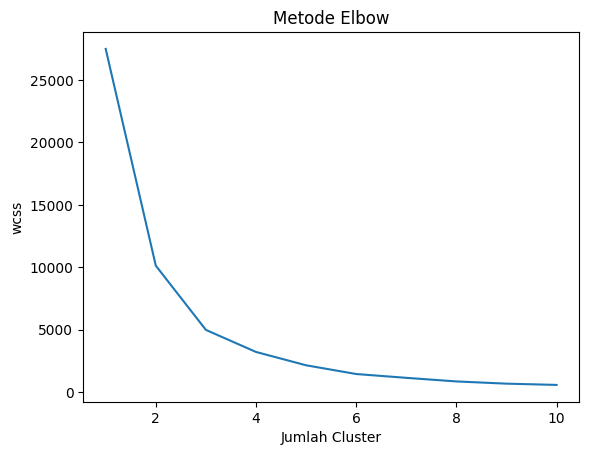

In [24]:
#perhitungan cluster dengan k-means dan visualisasi dengan metode ELBOW
X_means = data_stunting.iloc[: , [2, 3]].values

wcss = []
for i in range (1,11) :
  kmeans = KMeans(n_clusters= i, init = 'k-means++', random_state = 42)
  kmeans.fit(X_means)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('wcss')
plt.show()

In [25]:
#prediksi dengan membagi 3 Cluster
Y_predicted = KMeans(n_clusters = 3).fit_predict(data_stunting[['Berat','Tinggi']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
data_stunting['Cluster'] = Y_predicted
data_stunting.sample(10)

,TB Lahir,Usia Saat Ukur,Berat,Tinggi,Cluster
17,47.0,2.0,9.6,78.6,0
206,47.0,3.0,13.8,93.0,1
278,47.0,0.0,6.9,65.8,2
68,48.0,2.0,10.0,78.3,0
191,47.0,3.0,12.5,89.1,1
300,48.0,1.0,9.4,73.8,2
90,49.0,3.0,9.8,84.0,0
14,48.0,2.0,9.2,82.2,0
85,47.0,4.0,11.0,94.1,1
26,47.0,4.0,12.7,92.4,1
